In [1]:
#CTa-HW06-WeatherPy

In [2]:
# OBSERVATIONS

# 1) As we approach the Equater the weather temperatures goes up, which proves it's getting hotter.
# 2) As we approach the Equater the weather humidity goes up, which proves the temperature is rising.
# 3) As we approach the Equater the weather condition for cloudiness varies.

In [3]:
# import libraries to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import dependencies
import json
import requests as reqs
import time
from citipy import citipy

In [4]:
# List for holding lat_lngs and cities

lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
   # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

739

In [5]:
# create dataframe/table for cities with needed blank weather fields

city_weather = pd.DataFrame({"city" : cities})
city_weather['Latitude'] = ""
city_weather['Longitude'] = ""
city_weather['Temperature'] = ""
city_weather['Humidity'] = ""
city_weather['Cloudiness'] = ""
city_weather['Wind_Speed'] = ""
city_weather.head()

,city,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind_Speed
0,kampot,,,,,,
1,rikitea,,,,,,
2,bengkulu,,,,,,
3,jabinyanah,,,,,,
4,clyde river,,,,,,


In [6]:
# API Calls information
api_key = "d76bc1b567e345aae67a518a03e41fed"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [7]:
# Create an empty list of cities to store data from API

city_list = []

for index, row in city_weather.iterrows():
    city = row["city"]
    target_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&q=%s&appid=%s" % (city.replace(" ", "+"), api_key)
    weather = reqs.get(target_url).json()

    # retrieving all the fields required in assignment
    try:
        city_weather.set_value(index, "City_Number", weather['id'])  
        city_weather.set_value(index, "Latitude", weather['coord']['lat'])
        city_weather.set_value(index, "Longitude", weather['coord']['lon'])    
        city_weather.set_value(index, "Temperature", weather['main']['temp_max'])
        city_weather.set_value(index, "Humidity", weather['main']['humidity'])
        city_weather.set_value(index, "Cloudiness", weather['clouds']['all'])
        city_weather.set_value(index, "Wind_Speed", weather['wind']['speed'])
        city_list.append(row['city'])
    except:                                                           
        print("City Does Not Exist")
        
city_weather = city_weather[city_weather['city'].isin(city_list)]
        
city_weather.head()    

City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist
City Does Not Exist


,city,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind_Speed,City_Number
0,kampot,10.62,104.18,85.57,71,32,10,1831112.0
1,rikitea,-23.12,-134.97,77.56,100,88,15.7,4030556.0
2,bengkulu,-3.8,102.27,83.18,100,20,9.78,1649150.0
3,jabinyanah,35.03,10.91,48.2,76,20,6.93,2470260.0
4,clyde river,70.47,-68.59,3.2,91,90,23.04,5924351.0


In [8]:
# verify with a count that at least 500 cities are still left to graph

len(city_weather)

628

In [9]:
# display city weather
city_weather.head()

,city,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind_Speed,City_Number
0,kampot,10.62,104.18,85.57,71,32,10,1831112.0
1,rikitea,-23.12,-134.97,77.56,100,88,15.7,4030556.0
2,bengkulu,-3.8,102.27,83.18,100,20,9.78,1649150.0
3,jabinyanah,35.03,10.91,48.2,76,20,6.93,2470260.0
4,clyde river,70.47,-68.59,3.2,91,90,23.04,5924351.0


In [10]:
# Create final dataframe for data to be graphed and rename columns if necessary

city_weather_final = city_weather.rename(columns={'city': 'City_Name'})

city_weather_final.head()


,City_Name,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind_Speed,City_Number
0,kampot,10.62,104.18,85.57,71,32,10,1831112.0
1,rikitea,-23.12,-134.97,77.56,100,88,15.7,4030556.0
2,bengkulu,-3.8,102.27,83.18,100,20,9.78,1649150.0
3,jabinyanah,35.03,10.91,48.2,76,20,6.93,2470260.0
4,clyde river,70.47,-68.59,3.2,91,90,23.04,5924351.0


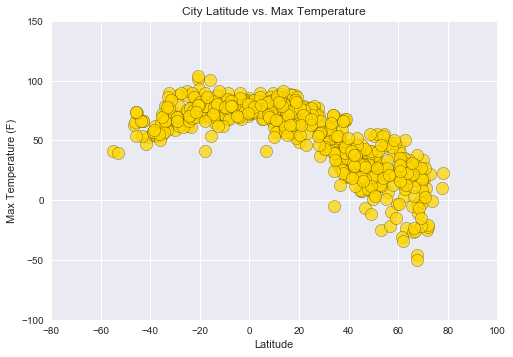

In [11]:
# Plot 4 graphs required

# Graph 1 - City Latitude vs. Max Temperature

Temperature = city_weather_final ["Temperature"]
Latitude = city_weather_final ["Latitude"]

# X and Y Limits
plt.ylim(-100, 150)
plt.xlim(-80, 100)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.scatter(Latitude, Temperature, marker="o", facecolors="gold", s=150, edgecolors="black", alpha=0.75)
          
plt.show()


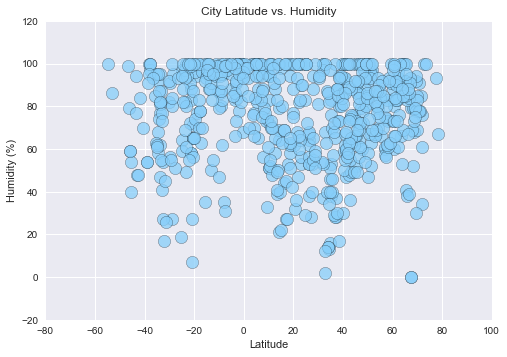

In [12]:
# Graph 2 - City Latitude vs. Humidity

Humidity = city_weather_final ["Humidity"]
Latitude = city_weather_final ["Latitude"]

# X and Y Limits
plt.ylim(-20, 120)
plt.xlim(-80, 100)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.scatter(Latitude, Humidity, marker="o", facecolors="lightskyblue", s=150, edgecolors="black", alpha=0.75)
          
plt.show()

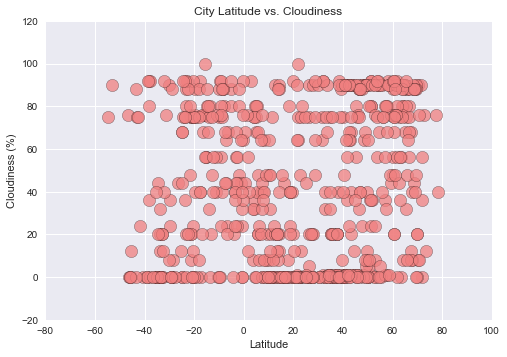

In [13]:
# Graph 3 - City Latitude vs. Cloudiness

Cloudiness = city_weather_final ["Cloudiness"]
Latitude = city_weather_final ["Latitude"]

# X and Y Limits
plt.ylim(-20, 120)
plt.xlim(-80, 100)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.scatter(Latitude, Cloudiness, marker="o", s=150, facecolors="lightcoral", edgecolors="black", alpha=0.75)
          
plt.show()

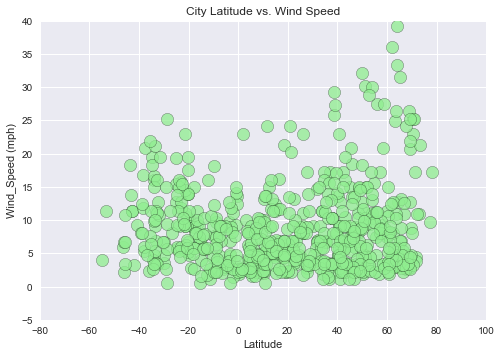

In [14]:
# Graph 4 - City Latitude vs. Wind Speed Graph

Wind_Speed = city_weather_final ["Wind_Speed"]
Latitude = city_weather_final ["Latitude"]

# X and Y Limits
plt.ylim(-5, 40)
plt.xlim(-80, 100)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed (mph)")

plt.scatter(Latitude, Wind_Speed, marker="o", s=150, facecolors="lightgreen", edgecolors="black", alpha=0.75)
          
plt.show()